In [1]:
import sys
sys.path.append("../")
sys.path.append("../Modules/")

import os

import numpy as np

%cd ../scripts/

/home/drfrbc/Neural-Modeling/scripts


In [2]:
sim_directory = '2024-07-09-14-33-47-FI'
#'2024-07-09-14-13-26-FI'
#'2024-07-09-13-34-36-FI'
#'2024-07-09-13-02-52-FI'#'2024-07-09-12-41-15-FI'#'2024-07-09-12-13-33-FI'#'2024-07-09-11-52-35-FI'#'2024-07-09-11-22-35-FI'
#'2024-07-09-10-58-03-FI'#'2024-07-09-10-31-04-FI'#'2024-07-09-09-39-45-FI'#'08-07-2024-15-15-02-FI_baseSynapses'#'11-06-2024-09-25-12-FinalFExcFR'#'11-06-2024-19-20-06-FISynapses'
#'11-06-2024-09-25-12-FinalFExcFR'# '11-06-2024-00-07-44-FinalFExcFR'#'11-06-2024-09-25-12-FinalFExcFR'
#'11-06-2024-00-07-44-FinalFExcFR'#'10-06-2024-23-29-29-FinalFExcFR'
#'10-06-2024-23-02-13-FinalFExcFR'
#'10-06-2024-22-11-03-FinalFExcFR'
#'10-06-2024-21-45-08-FinalFExcFR'#'10-06-2024-21-20-46-FinalFExcFR'
#'10-06-2024-20-33-14-FinalFExcFR'#'10-06-2024-19-46-34-FinalFExcFR'#'10-06-2024-18-06-23-FinalFExcFR'#'10-06-2024-17-29-38-TestingBenSynapses'
#'10-06-2024-15-59-04-FSynFixedEXCFR'#'10-06-2024-15-35-00-FSynFixedEXCFR'
#'10-06-2024-14-25-38-FSynMoreThan64Sims'#'10-06-2024-13-40-11-TestingSomaPCsAnd2ndBasals'#'10-06-2024-13-02-30-TestingSomaPCsAnd2ndBasals'#'10-06-2024-11-53-41-TestingSomaPCsAnd2ndBasals' #'10-06-2024-11-28-28-TestingSomaPCsAnd2ndBasals'#'10-06-2024-10-42-46-TestingSomaPCsAnd2ndBasals'#'10-06-2024-09-51-35-TestingSomaPCsAnd2ndBasals'#'09-06-2024-23-32-58-TestingSomaPCsAnd2ndBasals'#'09-06-2024-22-52-03-TestingSomaPCsAnd2ndBasals'#'09-06-2024-22-24-02-TestingNewPCsAndReleaseProbs'#'09-06-2024-21-55-56-TestingNewPCsAndReleaseProbs'#09-06-2024-20-45-08-Testing3dCoords'#'09-06-2024-19-37-13-Testing3dCoords' #'09-06-2024-16-49-21-Testing3dCoords'#09-06-2024-12-47-58-FSynapses'#'09-06-2024-12-19-56-FSynapses'#'09-06-2024-11-57-30-FSynapses'#'09-06-2024-11-40-14-FSynapses'#'07-06-2024-14-41-31-FSynapses'

excFR_fi = False # false: x-axis is current injection; true: x-axis is excFR shift.

In [3]:
from scripts.compare_fi import group_directories_by_prefix, collect_fi_data, sort_amplitudes_and_firing_rates, plot_all_fi_curves, plot_mean_and_std

# sim_directories = #[sim.path]#,'FI_Seeds30000Syn-23-05-2024-17-40-25']
save = True
save_directory = f"../notebooks/{sim_directory}"#f"../notebooks/{sim.title}"
os.makedirs(save_directory, exist_ok=True)

# for sim_directory in sim_directories:
#     grouped_directories = group_directories_by_prefix(sim_directory)
#     all_data = {}
#     for base_name, directories in grouped_directories.items():
#         try:
#             print("Collecting FI curves data for", base_name)
#             # amplitudes, firing_rates = collect_fi_data(directories, base_name)
#             # all_data[base_name] = (amplitudes, firing_rates)
#         except Exception as e:
#             print(f"Error processing {base_name}: {e}")


grouped_directories = group_directories_by_prefix(sim_directory)

all_data = {}
for celltype, seeds in grouped_directories.items():
    if excFR_fi:
        seed_data = collect_fi_data(seeds, get_amp=False)
    else:
        seed_data = collect_fi_data(seeds)
    all_data[celltype] = seed_data
    
data = sort_amplitudes_and_firing_rates(all_data)

--No graphics will be displayed.


In [4]:
data

{'Complex': {'Np5': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [6.0606060606060606,
    11.919191919191919,
    15.95959595959596,
    18.585858585858585,
    20.606060606060606]),
  'Np10': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [4.444444444444445,
    10.909090909090908,
    14.94949494949495,
    18.181818181818183,
    19.393939393939394]),
  'Np1000000': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [4.848484848484849,
    10.505050505050505,
    14.94949494949495,
    17.97979797979798,
    20.404040404040405])},
 'Branches': {'Np5': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [6.0606060606060606,
    11.919191919191919,
    16.565656565656564,
    19.19191919191919,
    22.02020202020202]),
  'Np10': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [4.848484848484849,
    11.313131313131313,
    15.555555555555555,
    18.78787878787879,
    21.616161616161616]),
  'Np1000000': ([0.0, 0.5, 1.0, 1.5, 2.0],
   [4.242424242424242,
    11.11111111111111,
    15.757575757575758,
    18.78787878787879,
    21.414141414141415])},
 'Trees': {'Np5': ([

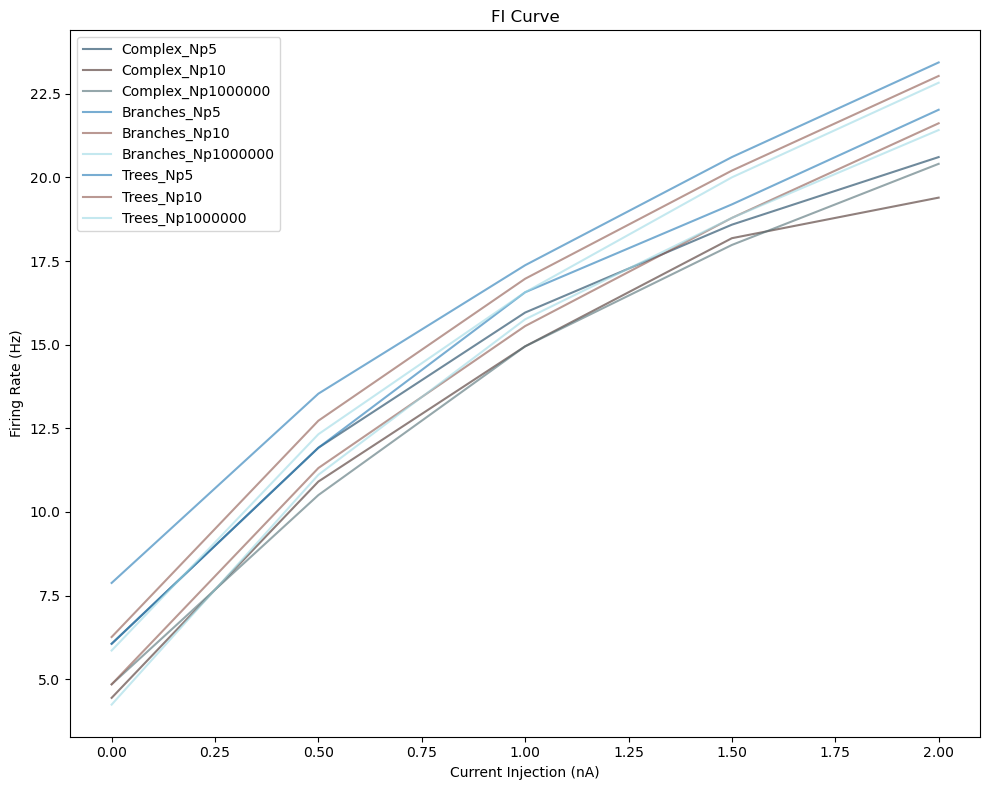

In [5]:
plot_all_fi_curves(data)

{'Complex': (array([0. , 0.5, 1. , 1.5, 2. ]), array([ 5.11784512, 11.11111111, 15.28619529, 18.24915825, 20.13468013]), array([0.68673663, 0.59473137, 0.47616618, 0.25196346, 0.53023622])), 'Branches': (array([0. , 0.5, 1. , 1.5, 2. ]), array([ 5.05050505, 11.44781145, 15.95959596, 18.92255892, 21.68350168]), array([0.75589038, 0.34336832, 0.43641352, 0.19046647, 0.25196346])), 'Trees': (array([0. , 0.5, 1. , 1.5, 2. ]), array([ 6.66666667, 12.86195286, 16.96969697, 20.26936027, 23.0976431 ]), array([0.87282703, 0.50392692, 0.32989761, 0.25196346, 0.25196346]))}


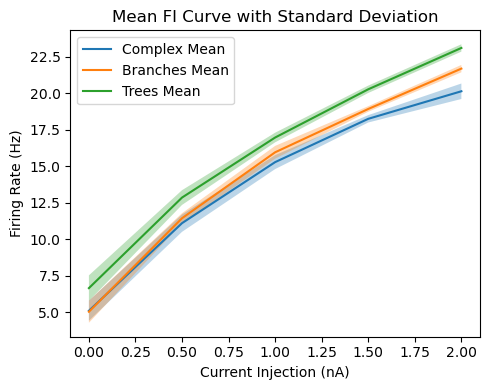

In [6]:
# plot_mean_and_std(data, x_axis='increase in mean FR for all exc synapses(Hz)')
# plot_mean_and_std(data, x_axis='Excitatory synapse FR (Hz)')
if excFR_fi: plot_mean_and_std(data, x_axis='Excitatory synapse FR (Hz)') 
else: plot_mean_and_std(data, x_axis='Current Injection (nA)')

In [7]:
# compute MSE and MAE of
def calculate_errors(y_true, y_pred):
    mse = np.mean((y_true - y_pred) * (y_true - y_pred))
    mae = np.mean(np.abs(y_true - y_pred))
    return mse, mae

errors = {}

for model in all_data.keys():
    errors[model] = []
    for seed in all_data['Complex'].keys():
        errors[model].append(calculate_errors(np.array(all_data['Complex'][seed][1]),np.array(all_data[model][seed][1])))
        
avg_errors = {}
for model,error in errors.items():
    avg_errors[model] = {'MSE': None, 'MAE': None}
    MSE_errors = [seed_errors[0] for seed_errors in error]
    MAE_errors = [seed_errors[1] for seed_errors in error]
    avg_errors[model]['MSE'] = round(np.mean(MSE_errors), 2)
    avg_errors[model]['MAE'] = round(np.mean(MAE_errors), 2)
    
for model, errors in avg_errors.items():
    print(f"{model}: {errors}")

Complex: {'MSE': 0.0, 'MAE': 0.0}
Branches: {'MSE': 5.97, 'MAE': 1.47}
Trees: {'MSE': 6.61, 'MAE': 2.29}
